In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
# We will use keras and Tensorflow here onwards

# First we will see if we have missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Duplicated Rows
df.duplicated().sum()

np.int64(0)

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
# Remove the first 3 Columns as we don't need them 

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# We need to do One Hot Encoding to the 2 Categorical Columns - Geography, Gender

from sklearn.preprocessing import OneHotEncoder 

In [15]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [16]:
ohe.fit_transform(df)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# But for specific columns - All the Data is numeric now

pd.get_dummies(df,columns=['Geography','Gender']) #This will not drop the first Category

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [19]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True) #This will drop the first Category

In [20]:
#Now We do the Standard Scaler - You should always split your data into training and testing sets before scaling

X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [22]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
X_train.shape

(8000, 11)

In [24]:
# Now we do the Standard Scaling on X_train 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
# We will make Sequential Models

model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 11)) # Input Layer + 1st Hidden Layer
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # Output Layer

c:\Users\Sanjog Bhalla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Model Compilation Stage - You tell what loss function to use, what optimizer for Gradient Descent to use and what metrics to monitor
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [50]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2) #train the Neural Network

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7572 - loss: 0.5485 - val_accuracy: 0.8000 - val_loss: 0.4816
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8047 - loss: 0.4613 - val_accuracy: 0.8062 - val_loss: 0.4439
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8130 - loss: 0.4296 - val_accuracy: 0.8156 - val_loss: 0.4230
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8245 - loss: 0.4122 - val_accuracy: 0.8206 - val_loss: 0.4116
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8305 - loss: 0.4020 - val_accuracy: 0.8231 - val_loss: 0.4018
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 0.3939 - val_accuracy: 0.8281 - val_loss: 0.3948
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8420 - loss: 0.3860 - val_accuracy: 0.8313 - val_loss: 0.3877
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8472 - loss: 0.3775 - val_accu

In [38]:
model.layers[0].get_weights()

[array([[-0.18924187, -0.14431952,  0.03435615, -0.0279324 ,  0.19685462,
         -0.2054061 , -0.1054366 , -0.00332226,  0.6831002 , -0.04202449,
         -0.12606896],
        [ 1.1620803 , -0.6215556 , -0.22318254, -0.67891943, -0.06447921,
          0.13768987,  0.6701117 ,  0.6685089 , -0.01378016,  0.23823358,
         -0.06862741],
        [ 0.24412233,  0.05432533, -0.09812365, -0.08708616,  0.10467471,
          0.55932164,  0.11432844,  0.0680296 , -0.6222048 , -0.13339795,
          0.06633589],
        [-0.19547151, -0.37560204,  0.0352082 , -0.58495593, -0.15392102,
         -0.533188  , -0.54374975,  0.27485   , -0.2687794 , -0.17396708,
          0.03974578],
        [ 0.08438981,  0.18831842,  0.08606484,  1.0692259 ,  0.2866461 ,
         -0.24487206, -0.96289515,  1.1356122 ,  0.10117871, -0.81730527,
         -0.01680989],
        [ 0.20359339, -0.10800859,  0.3993809 , -0.16175659,  0.16979335,
          0.03599884, -0.19171813,  0.112483  ,  0.12486567,  0.339993 

In [39]:
model.layers[1].get_weights()

[array([[-4.0561351e-01, -8.0363429e-01, -1.2586576e+00,  9.3020010e-01,
          6.2807852e-01,  1.2609930e-01, -4.8026341e-01, -4.1882288e-01,
         -8.1831366e-01,  1.6222149e-01, -8.4363055e-01],
        [-3.7502402e-01, -7.5470811e-01,  5.8223207e-02, -2.7928519e-01,
          3.1644651e-01, -9.2897765e-02,  4.6609643e-01, -2.6435015e-01,
         -4.1825309e-01, -3.9747542e-01, -2.5810609e+00],
        [ 4.7444332e-01,  2.6651743e-01,  1.4716671e-01,  2.8412823e-02,
         -4.8865849e-01, -6.6827232e-01,  8.9448676e-02, -3.1891415e-01,
          7.6144166e-02,  1.1938829e-01, -3.6182398e-01],
        [-4.5240191e-01,  1.7716664e-01, -2.5300217e-01,  3.5965112e-01,
         -3.9428446e-01, -1.5093410e-01,  4.4214386e-01,  2.3247886e-01,
          4.0195960e-01,  4.5781839e-01, -1.5800730e+00],
        [ 2.7174255e-01,  2.1963541e-01,  6.3564575e-01,  1.6155963e-01,
          2.2688890e-01,  5.3492790e-01,  1.6708440e-01,  3.2086781e-01,
         -1.3151512e-01, -7.0940489e-0

In [43]:
model.layers[2].get_weights()

[array([[-0.81456715],
        [-1.1797419 ],
        [-0.51446563],
        [-0.6545266 ],
        [-0.43821576],
        [ 0.83812857],
        [-1.1080345 ],
        [ 0.6259159 ],
        [ 2.2438436 ],
        [-0.80785805],
        [ 1.2876357 ]], dtype=float32),
 array([0.5703768], dtype=float32)]

In [40]:
y_log = model.predict(X_test_scaled) # Due to Sigmoid Activation Function, all outputs will be between 0 and 1 not 0 or 1
# So we will set a threshold of 0.5 to classify them into 0 and 1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
y_pred = np.where(y_log>0.5,1,0)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.869

In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

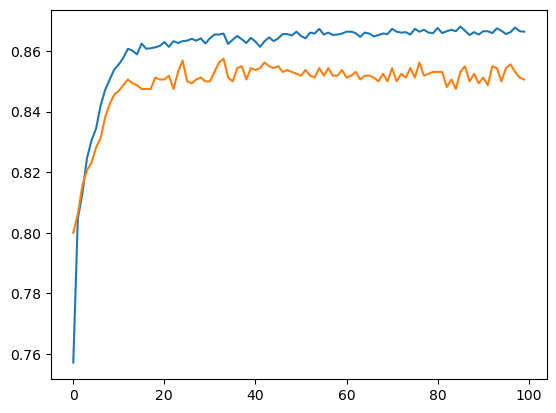

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

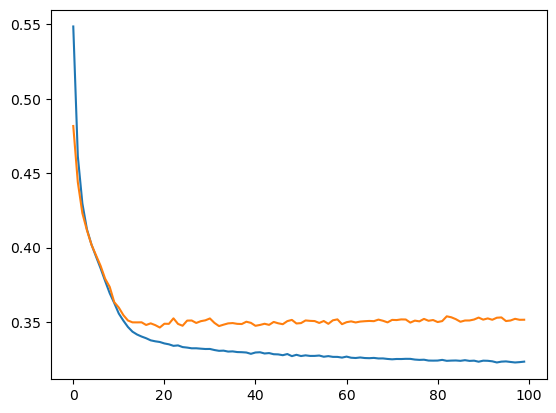

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # the gap between training and validation loss tells us about overfitting